Note 3/6/25: Unfortunately the Teleport API is not longer freely available for us to use :( This tends to happen alot... an API starts out free then a paywall goes up or it is not longer maintained. I'm still posting this example though so you can see a short API-based data storytelling example; however, know that this code does not run as is.

# Data Storytelling Example: Quality of Life Scores
## Motivation
Let's say that we are interested in how quality of life varies across different urban areas. Some reasons we might be interested in this include:
* Moving to a new area and wanting to do some research beforehand
* Considering establishing a new business and want to make sure the area can support it
* Etc. 

There are several aspects of quality of life that can be used to determine good places to live or start businesses. For example:
* Safety/crime rate
* Education
* Cost of living
* Access to outdoors, parks, recreation
* Traffic/travel connectivity, public transportation
* Etc. 

We can get this information from the [Teleport API](https://developers.teleport.org/). From the website:
>We're building the largest and most up-to-date quality of life database for Planet Earth using 300+ different data dimensions from 70+ different sources, all updated periodically. Our global sources include the World Bank, World Health Organization, United Nations, Reporters Without Borders, OpenStreetMap, GeoNames, OpenFlights, Heritage Foundation, AngelList, Airbnb, Seed-DB and others. On top of these we augment the sets with things like laws and regulations, real estate prices and recruitment market data from local sources from countries around the world.

## Making a Request
Let's make a request for quality of life data for Seattle. Seattle will be our *proof of concept*, showing that we can use the API and get the data we want from it.

There is an endpoint: `GET /urban_areas/{ua_id}/scores/` that we can use to get quality of life scores for an urban area. We need `ua_id` for Seattle. Looking at the documentation for the `GET /urban_areas/` endpoint, this is `slug:seattle`. 

In [1]:
import requests

url = "https://api.teleport.org/api/urban_areas/slug:seattle/scores/"
response = requests.get(url)
print(response.text)

{"_links":{"curies":[{"href":"https://developers.teleport.org/api/resources/Location/#!/relations/{rel}/","name":"location","templated":true},{"href":"https://developers.teleport.org/api/resources/City/#!/relations/{rel}/","name":"city","templated":true},{"href":"https://developers.teleport.org/api/resources/UrbanArea/#!/relations/{rel}/","name":"ua","templated":true},{"href":"https://developers.teleport.org/api/resources/Country/#!/relations/{rel}/","name":"country","templated":true},{"href":"https://developers.teleport.org/api/resources/Admin1Division/#!/relations/{rel}/","name":"a1","templated":true},{"href":"https://developers.teleport.org/api/resources/Timezone/#!/relations/{rel}/","name":"tz","templated":true}],"self":{"href":"https://api.teleport.org/api/urban_areas/slug:seattle/scores/"}},"categories":[{"color":"#f3c32c","name":"Housing","score_out_of_10":2.291},{"color":"#f3d630","name":"Cost of Living","score_out_of_10":3.79},{"color":"#f4eb33","name":"Startups","score_out_of

## Parsing the JSON Response
Now that we have the data for Seattle, we want to parse the category and score information out of it. We will store these category:score pairs in a pandas series for easy data exploration later.

In [2]:
import json
import pandas as pd

json_obj = json.loads(response.text)
category_list = json_obj["categories"]
cat_score_ser = pd.Series(dtype=float)
for category_obj in category_list:
    name = category_obj["name"]
    score = category_obj["score_out_of_10"]
    cat_score_ser[name] = score
print(cat_score_ser)

Housing                  2.291000
Cost of Living           3.790000
Startups                 8.367000
Venture Capital          7.551000
Travel Connectivity      2.884500
Commute                  4.523750
Business Freedom         8.671000
Safety                   5.636500
Healthcare               8.724333
Education                5.714500
Environmental Quality    7.560250
Economy                  6.514500
Taxation                 4.772000
Internet Access          4.940500
Leisure & Culture        8.115500
Tolerance                8.089500
Outdoors                 7.209500
dtype: float64


## Data Visualization
Let's visualize our Seattle quality of life score data using a bar chart (x-axis will be categories and y-axis will be scores).

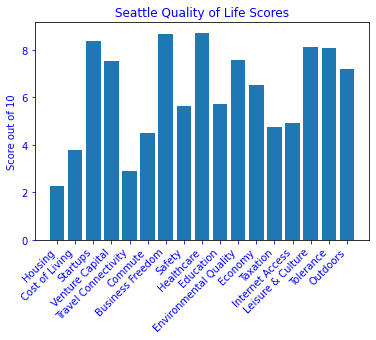

In [6]:
import matplotlib.pyplot as plt
# GS: answering question after class: add code to change labels?
color = 'blue'
plt.rcParams['text.color'] = color
plt.rcParams['axes.labelcolor'] = color
plt.rcParams['xtick.color'] = color
plt.rcParams['ytick.color'] = color

plt.bar(cat_score_ser.index, cat_score_ser)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Score out of 10")
plt.title("Seattle Quality of Life Scores")
plt.show()

## Insights
Some strengths of Seattle include:
1. Startups
1. Business freedom
1. Healthcare
1. Leisure and culture

Some weaknesses of Seattle include:
1. Housing
1. Cost of Living
1. Travel Connectivity
1. Taxation

## Conclusion
The Teleport API can be used to get quality of life scores for urban areas. Our proof of concept with Seattle demonstrated this. Future work includes requesting this data for other urban areas like Los Angeles and comparing to determine best places to start business and/or live.